In [1]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

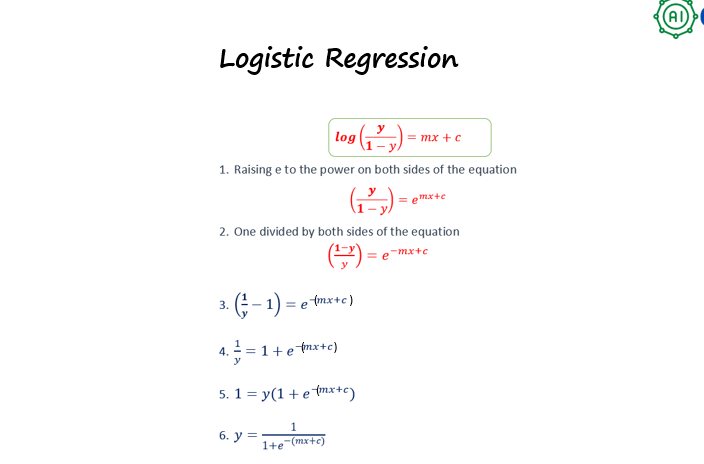

In [2]:
from IPython.display import Image
Image('index.png')

In [3]:
df=pd.read_csv('shoe.csv')

In [4]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


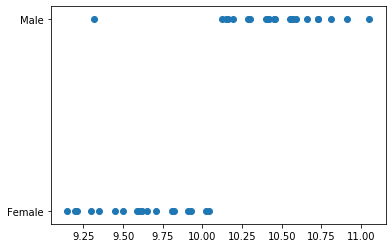

In [5]:
plt.scatter(df['size(cm)'],df['class(y)'])

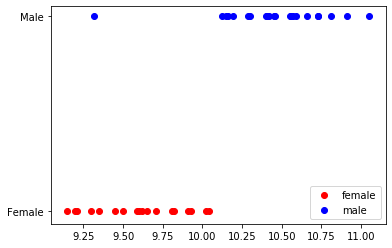

In [6]:

df0=df[df['class(y)']=='Female']
df1=df[df['class(y)']=='Male']
plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='male')
plt.legend()

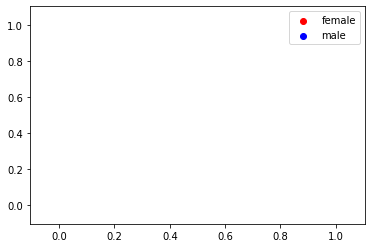

In [7]:
df0=df[df['class(y)']=='female']
df1=df[df['class(y)']=='male']
plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='female')
plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='male')
plt.legend()

In [8]:
#preprocessing
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [9]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [10]:
#x=df['size(cm)']
#y=df['class(y)']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']], df['class(y)'], test_size=.30,random_state=1)

In [13]:
xtrain.head()

,size(cm)
30,10.04
36,9.21
33,9.59
28,10.45
4,11.05


In [14]:
ytrain.head()

30    0
36    0
33    0
28    1
4     1
Name: class(y), dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
reg=LogisticRegression()

In [17]:
reg.fit(xtrain, ytrain)

D:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
reg.coef_

array([[0.0820095]])

In [19]:
reg.intercept_

array([-0.59660731])

In [20]:
reg.predict_proba(xtest)

array([[0.43607388, 0.56392612],
       [0.44618258, 0.55381742],
       [0.44820995, 0.55179005],
       [0.45755701, 0.54244299],
       [0.42802458, 0.57197542],
       [0.42963154, 0.57036846],
       [0.46061176, 0.53938824],
       [0.45816771, 0.54183229],
       [0.43244726, 0.56755274],
       [0.43849545, 0.56150455],
       [0.43627556, 0.56372444],
       [0.44577732, 0.55422268]])

In [21]:
reg.predict(xtest)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [22]:
ytest

2     1
31    0
3     0
21    0
27    1
29    1
22    0
39    1
19    1
26    1
32    1
17    0
Name: class(y), dtype: int64

In [23]:
logit=reg.score(xtest,ytest)
logit

0.5833333333333334

# KNN Classification with Sklearn

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [26]:
pred= knn.predict(xtest)
pred_probs = knn.predict_proba(xtest)[:,1]

In [27]:
np.round(knn.predict_proba(xtest),3)[:5]

array([[0. , 1. ],
       [0.8, 0.2],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ]])

In [28]:
np.max(pred_probs)

1.0

<function matplotlib.pyplot.show(*args, **kw)>

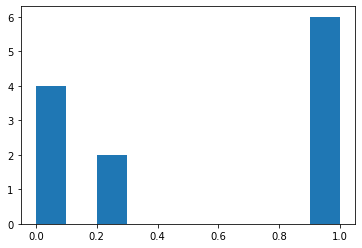

In [29]:
plt.hist(pred_probs)
plt.show

In [30]:
pred_probs_30=np.where(pred_probs>0.3,1,0)
pred_probs_70=np.where(pred_probs>0.7,1,0)

In [31]:

df_prediction=pd.DataFrame({'ytest':ytest,'pred':pred,
                         ' pred_probs_30':pred_probs_30,'pred_probs_70':pred_probs_70 })

In [32]:
df_prediction.head()

,ytest,pred,pred_probs_30,pred_probs_70
2,1,1,1,1
31,0,0,0,0
3,0,0,0,0
21,0,0,0,0
27,1,1,1,1


# Performance metrics:

In [33]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

Confusion matrix

In [34]:
print(confusion_matrix(ytest,pred))

[[5 0]
 [1 6]]


Built-in classification report

In [35]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



# Defining my own KNN report:

In [36]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



def my_KNN_report(xtrain, ytrain, xtest,ytest, K=5, threshold=0.5):
    knn= KNeighborsClassifier(n_neighbors=K)
    knn.fit(xtrain, ytrain)
    probs = knn.predict_proba(xtest)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(ytest, y_hat)
    accuracy = round(accuracy_score(ytest,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(ytest,y_hat),2)
    recall = round(recall_score(ytest,y_hat),2)
    f1score = round(f1_score(ytest,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled

In [37]:
my_KNN_report(xtrain,ytrain,xtest,ytest,K=5,threshold=0.5)

-----------------------------------------
Accuracy  = 0.9167
Error_rate  = 0.0833
Precision = 1.0
Recall    = 0.86
f1_score  = 0.92
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,5,0
Actual : positive,1,6


In [38]:
xtrain.shape

(28, 1)

# ROC and AUC

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.900


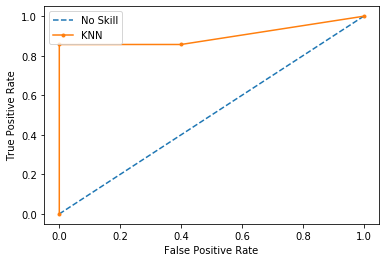

In [39]:
# generate a no skill (ns) prediction and KNN  (lr) predictions.
ns_probs = [0 for i in range(len(ytest))]
lr_probs = knn.predict_proba(xtest)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc = roc_auc_score(ytest, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(ytest, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

# Cross validation

In KNN, we use cross validation to find the optimal value of K.

In [40]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [41]:
# remember we saved our model in an object called "knn"
accuracy=cross_val_score(estimator=knn,X=xtrain,y=ytrain,cv=5,scoring="accuracy")

In [42]:
1-accuracy

array([0.16666667, 0.        , 0.16666667, 0.        , 0.        ])

In [43]:
error_rate=round((1-accuracy).mean(),4)
error_rate

0.0667

# Choosing K

Let's start with a simple error rate approach in the test set.

In [44]:
error_rate = []
k=28

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(xtrain, ytrain)
    error_rate.append(np.mean(ytest != KNN_i.predict(xtest)) )

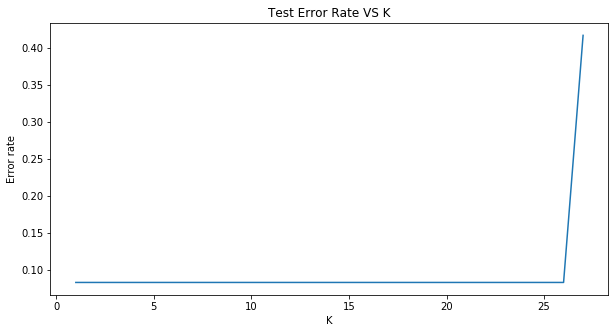

In [45]:
plt.figure(figsize=(10,5))
sns.lineplot(y=error_rate,x=range(1,k))
plt.title('Test Error Rate VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [46]:
error_rate_test=[]
error_rate_CV=[]
k=23
for i in range(1,k):
    KNN_i=KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(xtrain,ytrain)
    accuracy=cross_val_score(estimator=KNN_i,X=xtrain,y=ytrain,cv=5,scoring="accuracy")
    error_rate_CV.append(np.mean(1-accuracy))
    error_rate_test.append(np.mean(ytest != KNN_i.predict(xtest)) )
optimal_k=pd.DataFrame({'error_rate_CV':error_rate_CV,'error_rate_test':error_rate_test},index=range(1,k))

In [47]:
optimal_k.head()

,error_rate_CV,error_rate_test
1,0.000000,0.083333
2,0.000000,0.083333
3,0.066667,0.083333
4,0.100000,0.083333
5,0.066667,0.083333


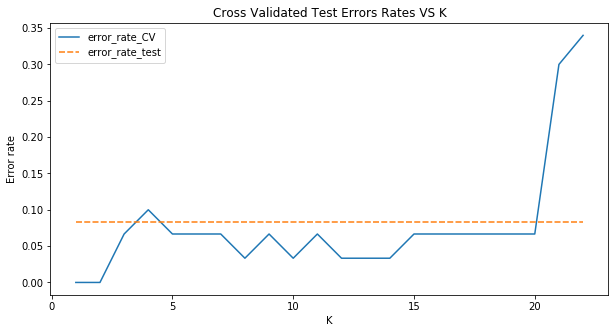

In [48]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated Test Errors Rates VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [49]:
optimal_k

,error_rate_CV,error_rate_test
1,0.000000,0.083333
2,0.000000,0.083333
3,0.066667,0.083333
4,0.100000,0.083333
5,0.066667,0.083333
6,0.066667,0.083333
7,0.066667,0.083333
8,0.033333,0.083333
9,0.066667,0.083333
10,0.033333,0.083333


In [50]:
my_KNN_report(xtrain,ytrain,xtest,ytest,K=6,threshold=0.5)

-----------------------------------------
Accuracy  = 0.9167
Error_rate  = 0.0833
Precision = 1.0
Recall    = 0.86
f1_score  = 0.92
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,5,0
Actual : positive,1,6


In [51]:
accuracy_df=pd.DataFrame({'Algorithm Name':['Logistic Regression','KNN Classifier'],'Accuracy':[0.58,0.83]})

In [52]:
accuracy_df

,Algorithm Name,Accuracy
0,Logistic Regression,0.58
1,KNN Classifier,0.83


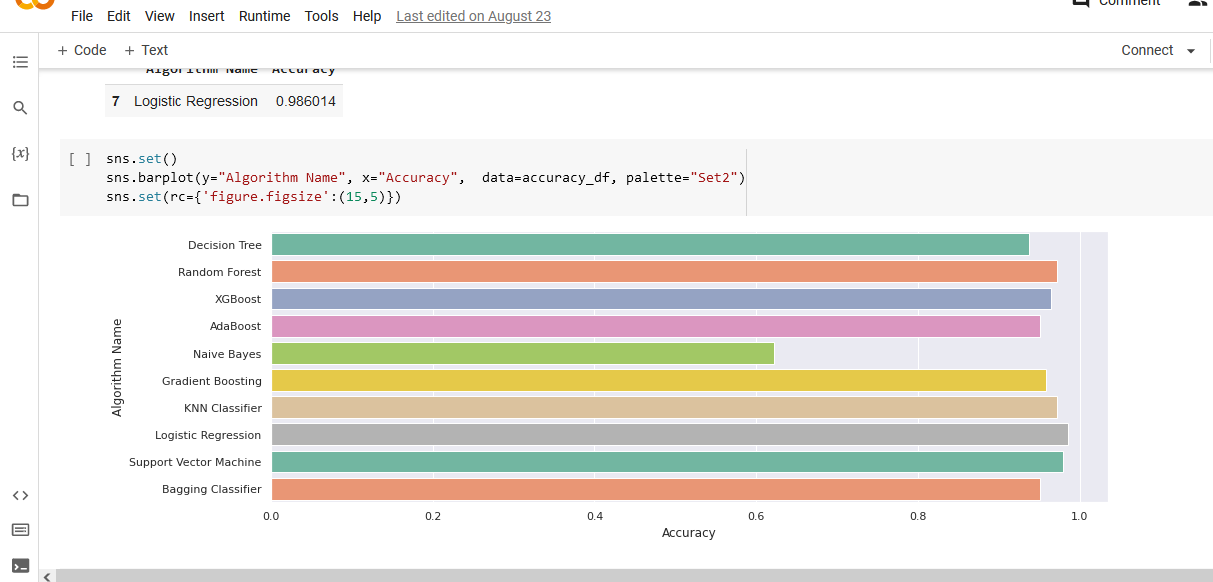

In [53]:
Image('logit.png')

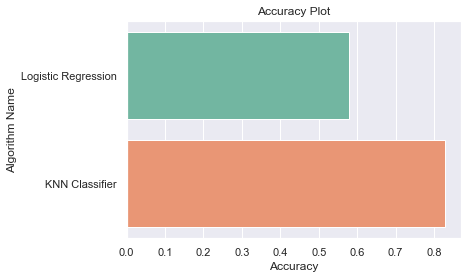

In [54]:
sns.set()
sns.barplot(y="Algorithm Name", x="Accuracy",  data=accuracy_df, palette="Set2").set(title='Accuracy Plot')
sns.set(rc={'figure.figsize':(10,5)})